# **Modelo de predição - Qualidade do sono**

## 1\. Contexto

Nesse projeto de análise de dados e machine learning a máquina será treinada para prever a qualidade do sono de uma pessoa através das horas dormidas pela mesma. O nível de qualidade vai de 1 a 10

O dataset pode ser baixado através desse link: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

## 2\. Pacotes e bibliotecas

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
#-----------------------------
#Bibliotecas de machine learning

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


## 3\. Exploração de dados

In [ ]:
# - coleta de dados;

sleep = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# - wrangling da estrutura;

sleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


<ipython-input-3-b11d3dc5ad3f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(sleep.corr(), annot=True)


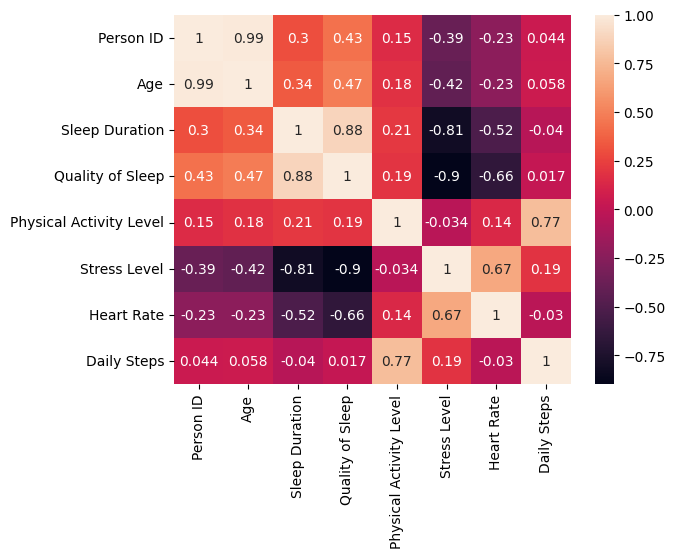

In [ ]:
ax = sns.heatmap(sleep.corr(), annot=True)

A coluna de interesse é a coluna " Quality of Sleep", vemos que elá só tem uma boa correlação com a coluna "Age" e uma forte correlação com a coluna "Sleep Duration", deletaremos as colunas com baixa correlação e veremos se o sexo da pessoa também tem correlação com a qualidade do sono

In [ ]:
# convertendo a variável categórica nominal usando a técnica de One-Hot-Encoding

sleep['sex_m'] = sleep['Gender'].apply(lambda sex: 1 if sex == 'Male' else 0)
sleep['sex_f'] = sleep['Gender'].apply(lambda sex: 1 if sex == 'Female' else 0)

### **3.1Limpeza**

In [ ]:
sleep = sleep.drop(sleep.columns[0:2],axis=1)
sleep = sleep.drop(sleep.columns[1],axis=1)
sleep = sleep.drop(sleep.columns[3:10],axis=1)

In [ ]:
sleep = sleep.drop(sleep.columns[1],axis=1)

In [ ]:
sleep = sleep.drop(sleep.columns[3:10],axis=1)

In [ ]:
sleep.head()

,Age,Sleep Duration,Quality of Sleep
0,27,6.1,6
1,28,6.2,6
2,28,6.2,6
3,28,5.9,4
4,28,5.9,4


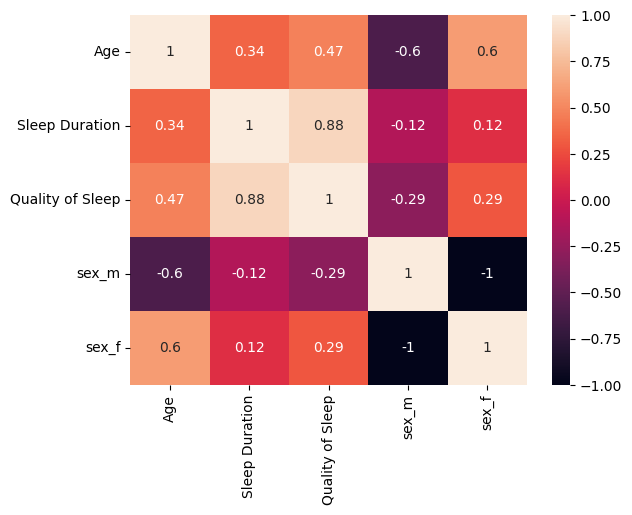

In [ ]:
ax = sns.heatmap(sleep.corr(), annot=True)

O sexo da pessoa não interfere na qualidade do sono então também pode ser deletado

In [ ]:
sleep = sleep.drop(sleep.columns[3:],axis=1)

In [ ]:
import matplotlib.pyplot as plt

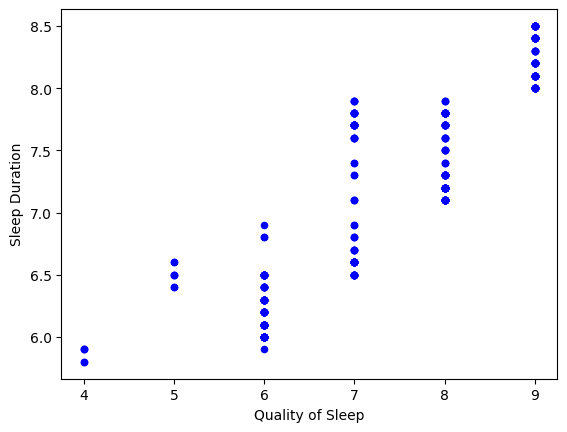

In [ ]:
df = sleep.plot.scatter(x = 'Quality of Sleep', y= 'Sleep Duration', c ="blue")

# To show the plot
plt.show()

Pode-se observar que quanto mais você dorme mais qualidade de sono você tem

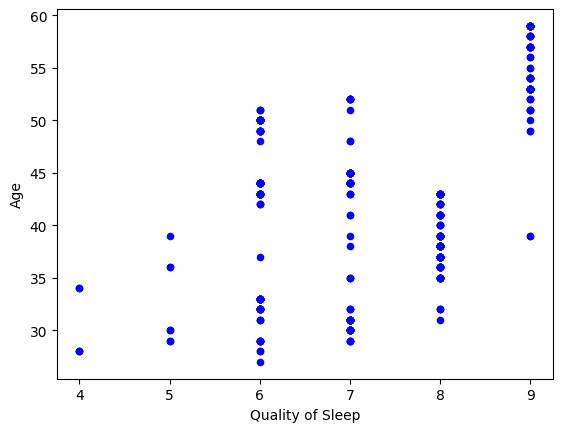

In [ ]:
df = sleep.plot.scatter(x = 'Quality of Sleep', y= 'Age', c ="blue")

# To show the plot
plt.show()

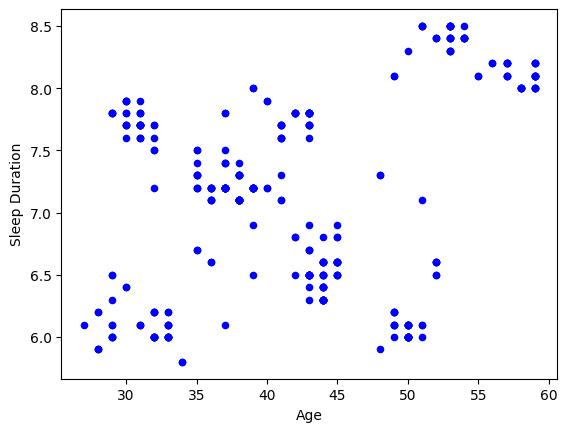

In [ ]:
df = sleep.plot.scatter(x = 'Age', y= 'Sleep Duration', c ="blue")

# To show the plot
plt.show()

Observando os gráficos com relação a idade, principalmente o primeiro , pode-se perceber que pessoas acima de 50 tem uma qualidade de sono melhores que pessoas mais jovens

In [ ]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               374 non-null    int64  
 1   Sleep Duration    374 non-null    float64
 2   Quality of Sleep  374 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 8.9 KB


Sabendo que não temos dados não nulos, podemos então treinar nossa máquina para as predições

### **3.2. Treino/Teste**

In [ ]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    sleep.drop(['Quality of Sleep'], axis=1),
    sleep['Quality of Sleep'],
    test_size=0.33,
    random_state=123
)

In [ ]:
predictors_train.head()

,Age,Sleep Duration
94,36,7.2
157,39,7.2
361,59,8.2
35,31,6.1
128,38,7.3


In [ ]:
target_train.head()

94     8
157    8
361    9
35     6
128    8
Name: Quality of Sleep, dtype: int64

## 4\. Modelagem

### **4.1. Treino**

In [ ]:
model = LinearRegression()

In [ ]:
model = model.fit(predictors_train, target_train)

In [ ]:
a = model.coef_
print(a)

[0.02358795 1.25159247]


In [ ]:
b = model.intercept_
print(b)

-2.569620308310258


### **4.2. Avaliação**

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
target_predicted = model.predict(predictors_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

0.5138204755712947


In [ ]:
sleep_me = np.array([23, 6])

In [ ]:
qualidade = model.predict(sleep_me.reshape(1, -1))
print(qualidade)

[5.4824573]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


De acordo com a predição, a qualidade de sono da pessoa está baixa e não atingiu a média, ela terá que dormir por mais horas pra ter um sono de qualidade, faremos testes para ver o total de horas ideal para essa pessoa dormir

In [ ]:
sleep_me = np.array([23, 7])
qualidade = model.predict(sleep_me.reshape(1, -1))
print(qualidade)

[6.73404977]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
sleep_me = np.array([23, 8])
qualidade = model.predict(sleep_me.reshape(1, -1))
print(qualidade)

[7.98564224]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
sleep_me = np.array([23, 9])
qualidade = model.predict(sleep_me.reshape(1, -1))
print(qualidade)

[9.23723471]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Podemos observar que de 8 a 9 horas a qualidade de sono já está boa o suficiente pra essa pessoa

## 5\. Conclusões

Através da análise e do treino pode-se notar que pessoas mais jovens dormem menos e por isso tem menos qualidade de sono, isso pode ocorrer por diversos fatores mas principalmente pela rotina.
Enquanto os idosos dormem mais horas e tem uma melhor qualidade do sono
Se você dormir entre 8 e 9 horas terá uma ótima qualidade de sono de acordo com o treino que foi realizado na análise